First we start by cleaning / combining all the datasets we are working with.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [107]:

df_all = pd.read_csv("df_all.csv")
df_owner_info = pd.read_csv("df_owner_info.csv")

In [108]:
df_owner_info["num_total_violations"] = df_owner_info.apply(lambda x: ( x.num_low_violations  + x.num_medium_violations + x.num_high_violations) , axis = 1)
df_owner_info["score"] = df_owner_info.apply(lambda x: (( x.num_low_violations * .2) + (x.num_medium_violations*.3) + (x.num_high_violations*.5)) , axis = 1)


In [109]:
df_all.head()

,Unnamed: 0,violation_type,description,address,owner,latitude,longitude,violation_date,year_built,violation_severity
0,0,Enforcement Violations,Improper storage trash: res,"26-30 FLEET ST, 02113",PIZZUTI DONATO F,42.36459,-71.05254,2022-10-27T00:00:00,1920.0,low
1,1,Enforcement Violations,Improper storage trash: res,"354-356 HANOVER ST, 02113",ORANGE TREE LANE TRUST,42.36521,-71.05327,2022-10-27T00:00:00,1899.0,low
2,2,Enforcement Violations,Improper storage trash: res,"16-18 HANOVER AVE, 02109",16-18 HANOVER AVENUE REALTY TRUST,42.36581,-71.05218,2022-10-27T00:00:00,1899.0,low
3,3,Enforcement Violations,Improper storage trash: res,"194 SALEM ST # 5, 02113",16 MYSTIC STREET LLC,42.36690,-71.05457,2022-10-27T00:00:00,1910.0,low
4,4,Enforcement Violations,Improper storage trash: res,"213 HANOVER ST, 02113",CAPARELLA ROBERT A,42.36271,-71.05530,2022-10-27T00:00:00,1899.0,low


In [110]:
df_owner_info.head()

,Unnamed: 0,owner,num_low_violations,num_medium_violations,num_high_violations,num_units_owned,num_total_violations,score
0,0,36-38 CUNARD STREET LLC,1.0,0.0,0.0,1,1.0,0.2
1,1,CRISTALLO GINA TS,2.0,3.0,0.0,1,5.0,1.3
2,2,GPD BRIMMER 4 LLC,2.0,0.0,0.0,1,2.0,0.4
3,3,GUIDO DOMINGOS DOS SANTOS,1.0,3.0,1.0,1,5.0,1.6
4,4,LOTUS AVENUE LLC,2.0,4.0,1.0,1,7.0,2.1


Here is the number of violations for each types of violations.

Text(0, 0.5, 'Count')

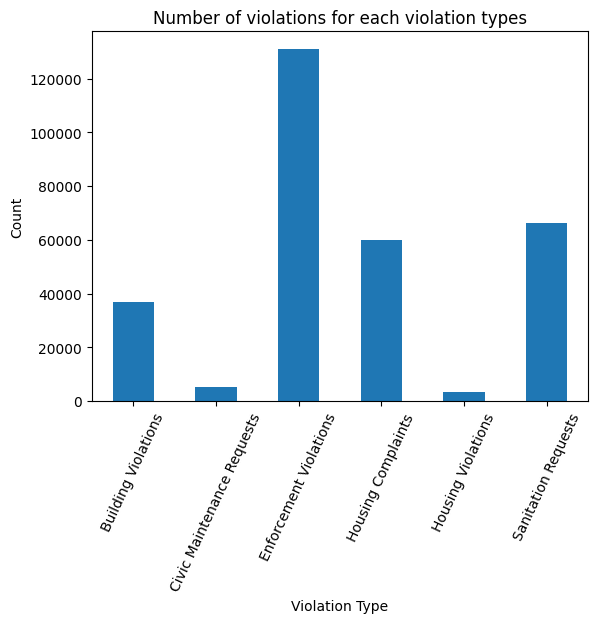

In [111]:
num_violations = df_all.groupby("violation_type")["violation_type"].count()
ax = num_violations.plot.bar(x='violation_type', y='count', rot=0)
ax.tick_params(axis="x", labelrotation= 65)
plt.title("Number of violations for each violation types")
plt.xlabel("Violation Type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

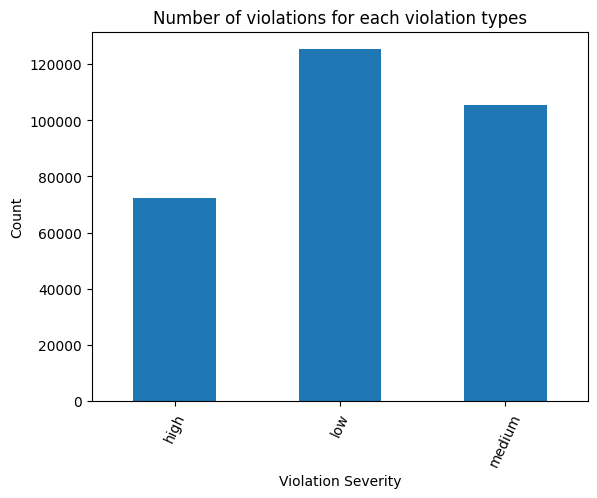

In [112]:
num_violations = df_all.groupby("violation_severity")["violation_severity"].count()
ax = num_violations.plot.bar(x='violation_severity', y='count', rot=0)
ax.tick_params(axis="x", labelrotation= 65)
plt.title("Number of violations for each violation types")
plt.xlabel("Violation Severity")
plt.ylabel("Count")

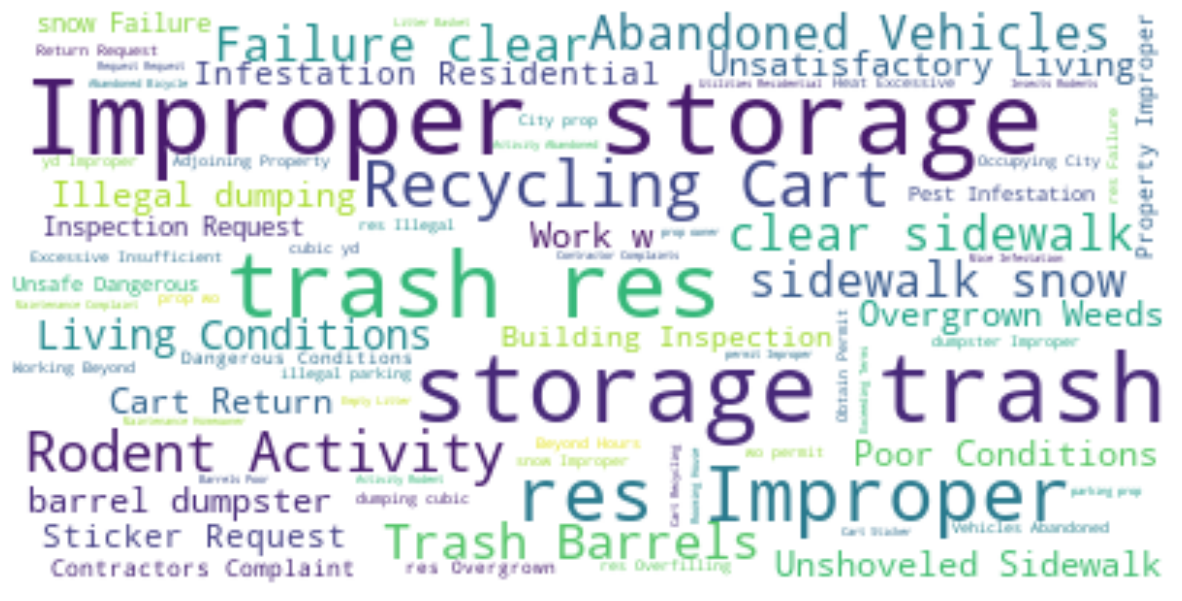

In [113]:
from wordcloud import WordCloud
text = " ".join(i for i in df_all.description)
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0, 0.5, 'Score')

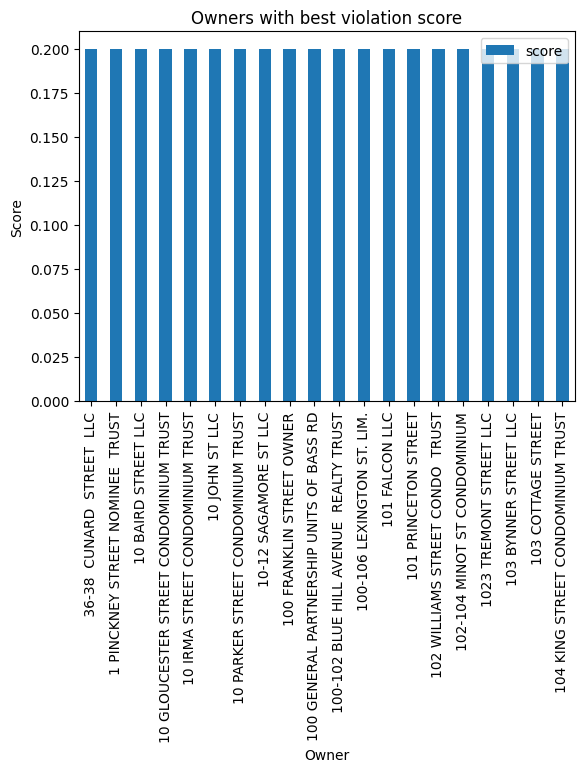

In [114]:
best_owners = df_owner_info.nsmallest(20, ['score'])
ax = best_owners.plot.bar(x='owner', y='score', rot=0)
ax.tick_params(axis="x", labelrotation= 90)
plt.title("Owners with best violation score")
plt.xlabel("Owner")
plt.ylabel("Score")

Text(0, 0.5, 'Total number of Violations')

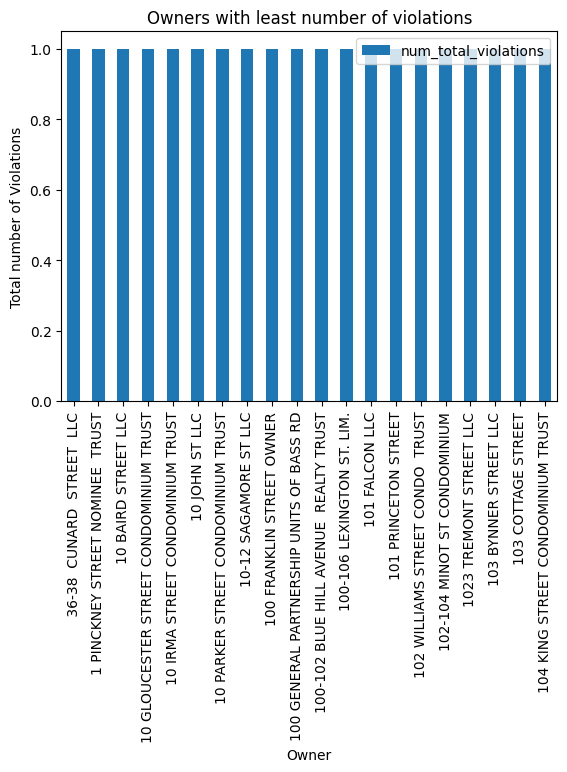

In [115]:
best_owners = df_owner_info.nsmallest(20, ['num_total_violations'])
ax = best_owners.plot.bar(x='owner', y='num_total_violations', rot=0)
ax.tick_params(axis="x", labelrotation= 90)
plt.title("Owners with least number of violations")
plt.xlabel("Owner")
plt.ylabel("Total number of Violations")

Text(0, 0.5, 'Score')

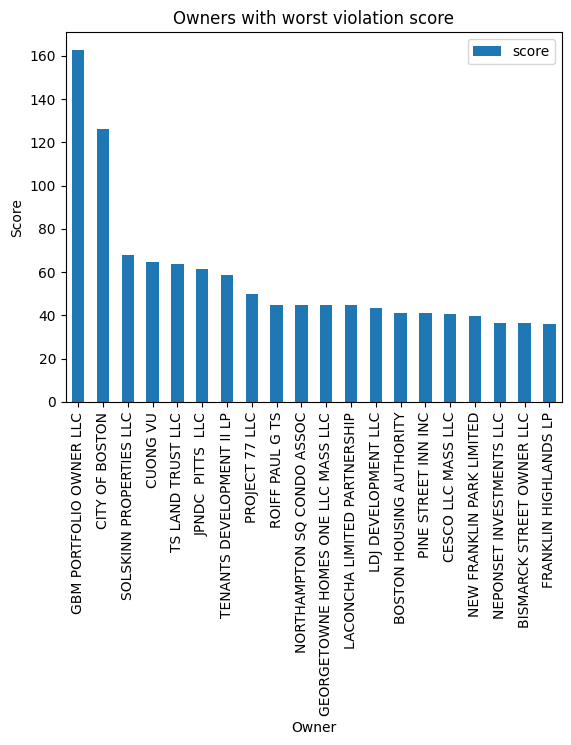

In [116]:
worst_owners = df_owner_info.nlargest(20, ['score'])
ax = worst_owners.plot.bar(x='owner', y='score', rot=0)
ax.tick_params(axis="x", labelrotation= 90)
plt.title("Owners with worst violation score")
plt.xlabel("Owner")
plt.ylabel("Score")

Text(0, 0.5, 'Total number of Violations')

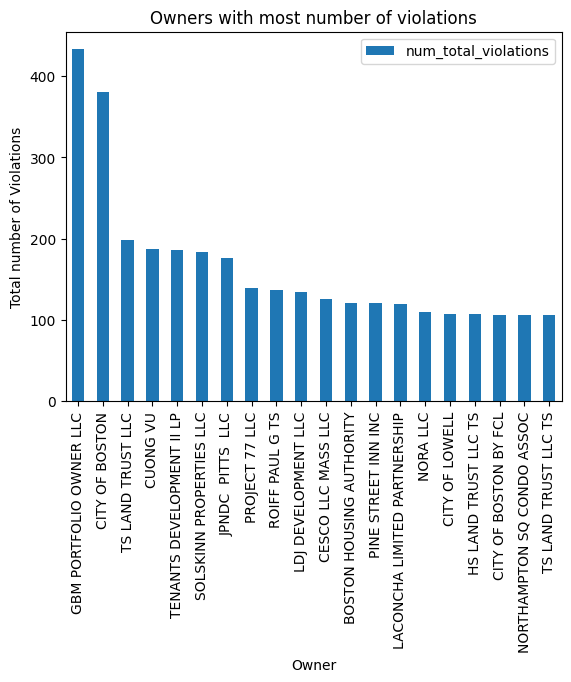

In [117]:
worst_owners = df_owner_info.nlargest(20, ['num_total_violations'])
ax = worst_owners.plot.bar(x='owner', y='num_total_violations', rot=0)
ax.tick_params(axis="x", labelrotation= 90)
plt.title("Owners with most number of violations")
plt.xlabel("Owner")
plt.ylabel("Total number of Violations")